<a href="https://colab.research.google.com/github/adhalya/estatistica_regressao_logistica_e_classificacao/blob/main/DataSet_Digits_Modelo_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### DataSet Digits

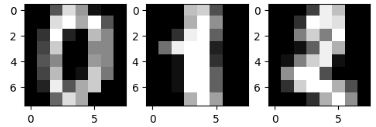

Descrição:
- Variáveis atributos: **pixel_x_x** As colunas atributos são constituídas por valores que definem a cor de cada pixel.
- Variável target: **target** Indica qual número a imagem forma quando todos os valores dos pixels estão unidos.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca de importação do dataset load_digits
from sklearn.datasets import load_digits

# Importando o dataset
digits_bunch = load_digits()
digits_bunch

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
# Trasformando o dataset de array para tabela com a biblioteca pandas
digits = pd.DataFrame(data=digits_bunch.data, columns=digits_bunch.feature_names)

# Incluindo a variável Target no dataset
digits['target'] = digits_bunch.target

digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


##### Análise Inicial

In [10]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [11]:
digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [12]:
# Analisando se no DataSet contém valores nulos
analise_digits = pd.DataFrame(digits.dtypes)
analise_digits.columns = ["Dtype"]
analise_digits['Valores Nulos'] = digits.isnull().sum()
analise_digits['% Valores Nulos'] = (digits.isnull().sum() / digits.shape[0]) * 100
analise_digits['NUnique']= digits.nunique()

analise_digits

,Dtype,Valores Nulos,% Valores Nulos,NUnique
pixel_0_0,float64,0,0.0,1
pixel_0_1,float64,0,0.0,9
pixel_0_2,float64,0,0.0,17
pixel_0_3,float64,0,0.0,17
pixel_0_4,float64,0,0.0,17
...,...,...,...,...
pixel_7_4,float64,0,0.0,17
pixel_7_5,float64,0,0.0,17
pixel_7_6,float64,0,0.0,17
pixel_7_7,float64,0,0.0,17


> *O dataset contém 1797 linhas e não possuem dados nulos. As variáveis atributos são do tipo **float** enquanto que a variável target é do tipo **int**, não necessitando passar por transformação de tipos.*

##### Treinando o Modelo

In [13]:
# Importando os pacotes do Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [14]:
# Definindo as variáveis atributos e a variável target do modelo
digits = pd.DataFrame(data=digits_bunch.data, columns=[f'pixel_{i}' for i in range(digits_bunch.data.shape[1])])
digits['target'] = digits_bunch.target

features = [f'pixel_{i}' for i in range(digits_bunch.data.shape[1])]
target = "target"

X1 = digits[features]
y1 = digits[target]


In [15]:
# Separando as variáveis de teste e treino do modelo na porcentagem 80-20.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Aplicando a regressão logística para treinar o modelo
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [16]:
# Aplicação do Modelo
y_pred1 = model1.predict(X_test1)

# Previsão da Probabilidade
y_pred_proba1 = model1.predict_proba(X_test1)[:, 1]

In [17]:
# Testando o Modelo
X_test1["Previsao_Modelo"] = y_pred1
X_test1["Probabilidade_Número"] = y_pred_proba1

In [18]:
X_test1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,Previsao_Modelo,Probabilidade_Número
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0,6,7.100585e-11
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0,9,8.110726e-12
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0,3,1.699772e-16
438,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0,7,2.264260e-07
1270,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0,2,1.680383e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,4,2.570505e-10
1630,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,16.0,12.0,1.0,0.0,3,2.129473e-08
1037,0.0,0.0,7.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,11.0,10.0,10.0,0.0,0.0,8,3.693400e-05
965,0.0,0.0,7.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,16.0,16.0,16.0,4.0,0.0,3,4.583474e-11


#### Testando o Modelo

In [19]:
# Calculando as métricas
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')
recall1 = recall_score(y_test1, y_pred1, average='macro')

print(f'Accuracy: {accuracy1:.2f}')
print(f'Precision: {precision1:.2f}')
print(f'Recall: {recall1:.2f}')

Accuracy: 0.97
Precision: 0.98
Recall: 0.98


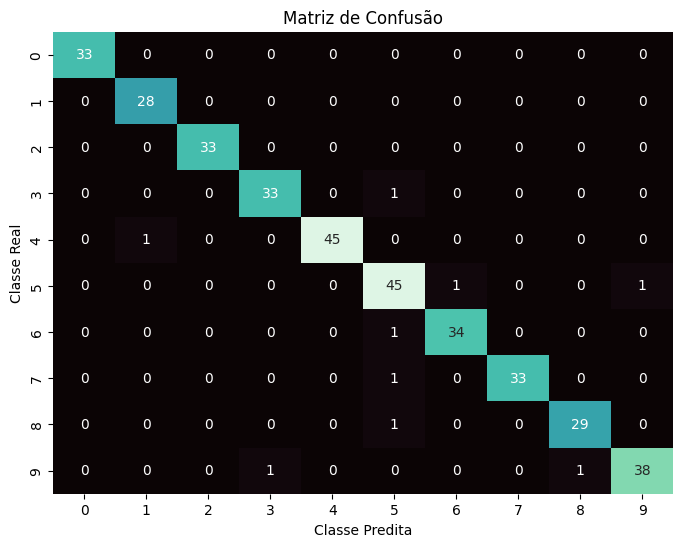

In [20]:
# @title Matriz de Confusão
# Calculando a matriz de confusão
cm1 = confusion_matrix(y_test1, y_pred1)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='mako', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

> *Pelos resultados obtidos dos testes podemos perceber que o modelo conseguiu prever uma grande parte dos resultados, tendo apenas alguns pequenos erros, podemos dizer que foi um resultado positivo já que a acurácia, a precisão e o recall estão com valores próximos a 1.*

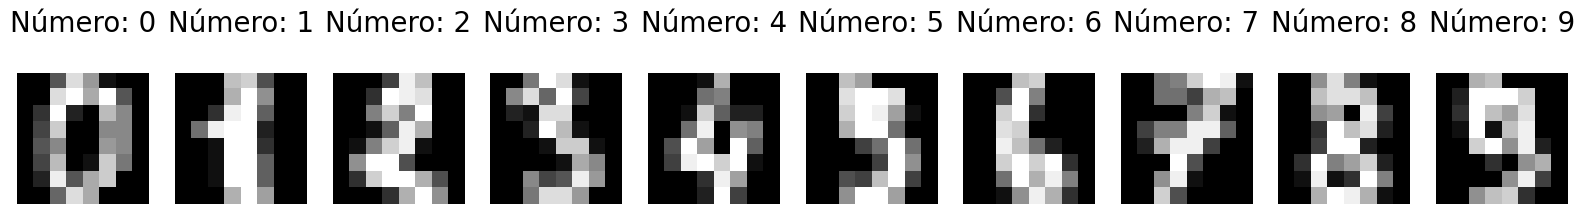

In [21]:
# @title Gráfico de Visualização dos Dados
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.iloc[0:10, :-1].values, digits.iloc[0:10, -1].values)):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Número: %i\n' % label, fontsize=20)
    plt.axis('off')

plt.show()